# Statistics Analysis Bomberman Project

### Packages

In [293]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Append current directory
current_directory = os.path.abspath("data_analysis")
if current_directory not in sys.path:
    sys.path.append(current_directory)
# Plot
import plot_options

## Load data

In [294]:
def load_data(file_path):
    """
    Load csv into a dataframe
    """
    
    if not os.path.isfile(file_path):
        print(f"File not found in: {file_path}")
        sys.exit(1)

    data = pd.read_csv(file_path)
    return data

file_root = "data_analysis/data_for_report/"

ts_1_1_1_1 = load_data(file_root + "ts-1-1-1-1.csv")
ts_2_1_1_4 = load_data(file_root + "ts-2-1-1-4.csv")
ts_nat_1_1_1 = load_data(file_root + "ts-nat-1-1-1.csv")
ts_2_1_1_4.columns

Index(['Start Timestamp', 'Elapsed Time (s)', 'Rounds Played', 'Score',
       'Total Reward', 'Loss', 'BOMB_DROPPED', 'BOMB_EXPLODED',
       'COIN_COLLECTED', 'COIN_FOUND', 'CRATE_DESTROYED', 'GOT_KILLED',
       'INVALID_ACTION', 'KILLED_OPPONENT', 'KILLED_SELF', 'MOVED_DOWN',
       'MOVED_LEFT', 'MOVED_RIGHT', 'MOVED_UP', 'OPPONENT_ELIMINATED',
       'SURVIVED_ROUND', 'WAITED', 'UP', 'RIGHT', 'DOWN', 'LEFT', 'WAIT'],
      dtype='object')

### Learning to walk

In [295]:
# Want to calculate how many moves:
action_columns = ["UP", "RIGHT", "DOWN", "LEFT", "WAIT"]
action_columns_nat = ["UP", "RIGHT", "DOWN", "LEFT", "WAIT"]

invalid_ones_1_1_1_1 = ts_1_1_1_1["INVALID_ACTION"].values
invalid_ones_2_1_1_4 = ts_2_1_1_4["INVALID_ACTION"].values
invalid_ones_nat = ts_nat_1_1_1["INVALID_ACTION"].values

total_moves_1_1_1_1 = ts_1_1_1_1[action_columns].sum(axis = 1).values
total_moves_2_1_1_4 = ts_2_1_1_4[action_columns].sum(axis = 1).values
total_moves_nat = ts_nat_1_1_1[action_columns_nat].sum(axis = 1).values

total_rounds_1_1_1_1 = ts_1_1_1_1["Rounds Played"].cumsum().values
total_rounds_nat = ts_nat_1_1_1["Rounds Played"].cumsum().values

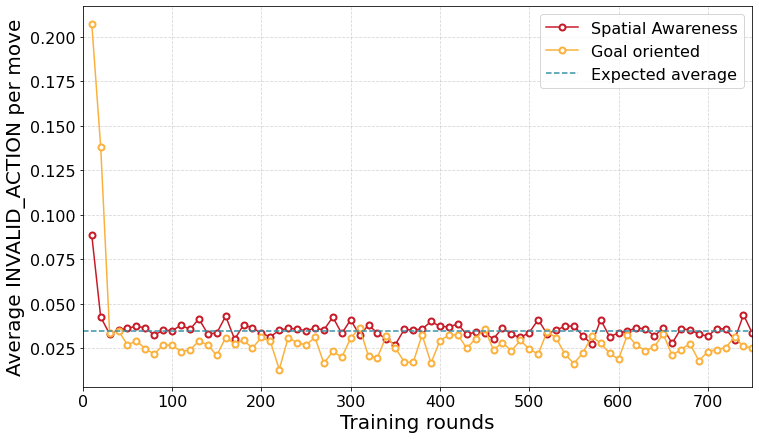

In [296]:
# Plot
fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_1_1_1_1, invalid_ones_1_1_1_1 / total_moves_1_1_1_1, label = "Enhanced Spatial Awareness")
ax.plot(total_rounds_1_1_1_1, invalid_ones_2_1_1_4 / total_moves_2_1_1_4, label = "Spatial Awareness")
ax.plot(total_rounds_nat, invalid_ones_nat / total_moves_nat, label = "Goal oriented")
ax.axhline(0.035, ls = '--', label = 'Expected average', marker = 'None', color = plot_options.color_palette[3])
ax.set_ylabel("Average INVALID_ACTION per move")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 750)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/learning_to_walk.png", dpi = 100)

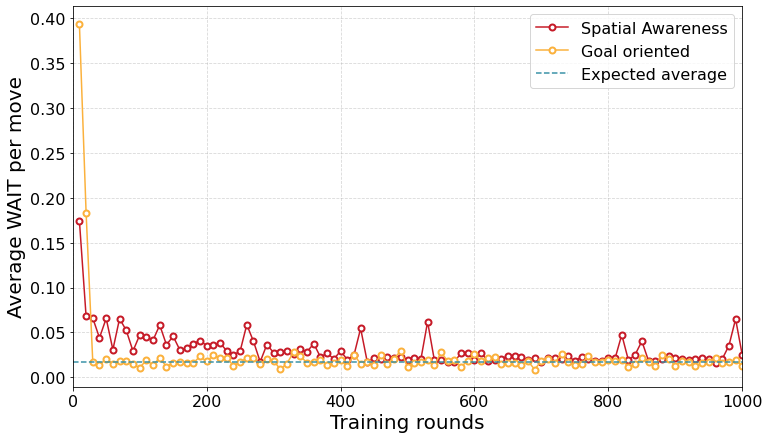

In [297]:
wait_ones_1_1_1_1 = ts_1_1_1_1["WAIT"].values
wait_ones_2_1_1_4 = ts_2_1_1_4["WAIT"].values
wait_ones_nat = ts_nat_1_1_1["WAIT"].values

# Plot
fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_1_1_1_1, wait_ones_1_1_1_1 / total_moves_1_1_1_1, label = "Enhanced Spatial Awareness")
ax.plot(total_rounds_1_1_1_1, wait_ones_2_1_1_4 / total_moves_2_1_1_4, label = "Spatial Awareness")
ax.plot(total_rounds_nat, wait_ones_nat / total_moves_nat, label = "Goal oriented")
ax.axhline(0.017, ls = '--', label = 'Expected average', marker = 'None', color = plot_options.color_palette[3])
ax.set_ylabel("Average WAIT per move")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 1000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/learning_to_walk_2.png", dpi = 100)

### Get a well paying job

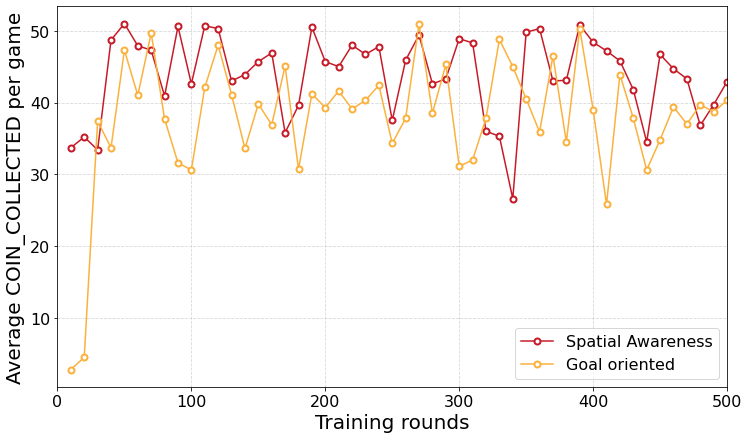

In [298]:
# Load new data
def analyze_stat(file_name, stat):
    ts = load_data(file_root + file_name)
    ts_stat = ts[stat].values
    ts_total_rounds = ts["Rounds Played"].cumsum().values
    ts_rounds_played = ts["Rounds Played"].values
    # Normalize to per game
    log_frequency = 10
    ts_stat = ts_stat / ts_rounds_played
    
    return ts_stat, ts_total_rounds


coins_dqn, total_rounds_dqn = analyze_stat("ts-coin-heaven-dqn.csv", "COIN_COLLECTED")
coins_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "COIN_COLLECTED")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, coins_dqn, label = "Spatial Awareness")
ax.plot(total_rounds_nat, coins_nat, label = "Goal oriented")

ax.set_ylabel("Average COIN_COLLECTED per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 500)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/get_a_well_paying_job.png", dpi = 100)

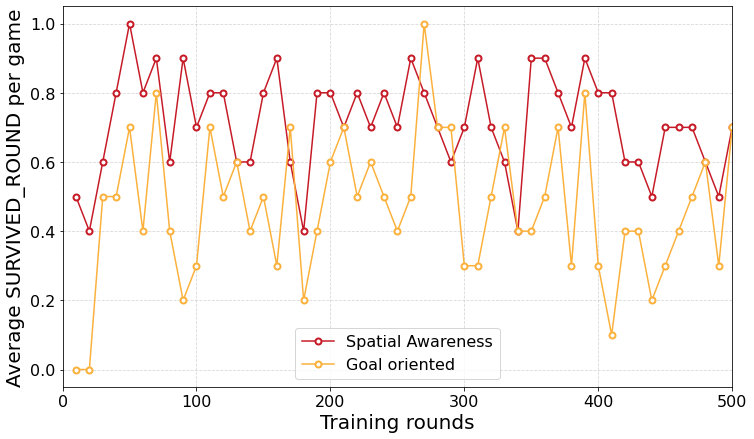

In [299]:
survived_dqn, total_rounds_dqn = analyze_stat("ts-coin-heaven-dqn.csv", "SURVIVED_ROUND")
survived_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "SURVIVED_ROUND")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, survived_dqn, label = "Spatial Awareness")
ax.plot(total_rounds_nat, survived_nat, label = "Goal oriented")

ax.set_ylabel("Average SURVIVED_ROUND per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 500)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/get_a_well_paying_job_2.png", dpi = 100)

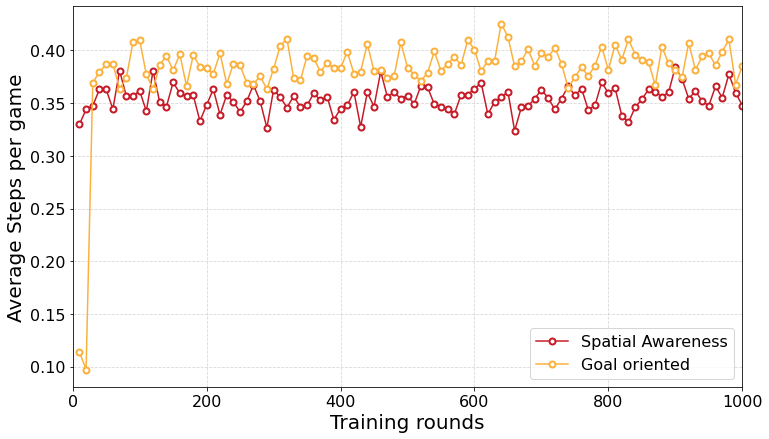

In [300]:
steps_dqn, total_rounds_dqn = analyze_stat("ts-coin-heaven-dqn.csv", "Steps")
#survived_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "SURVIVED_ROUND")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, coins_dqn / steps_dqn, label = "Spatial Awareness")
ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average Steps per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(0, 1000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/get_a_well_paying_job_3.png", dpi = 100)

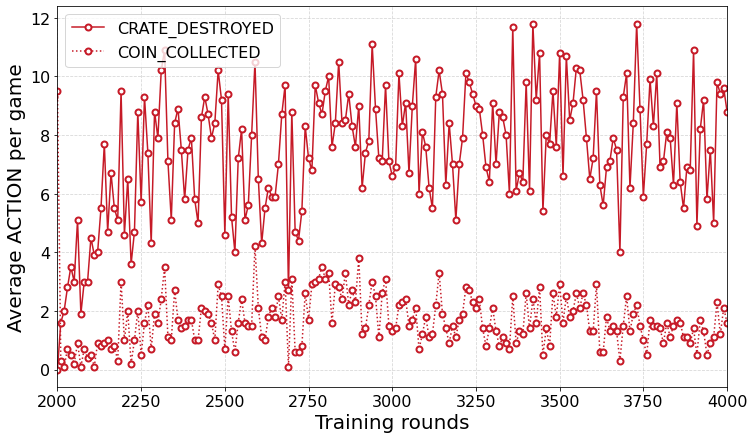

In [301]:
crates_dqn, total_rounds_dqn = analyze_stat("ts-almost-empty-dqn.csv", "CRATE_DESTROYED")
coins_dqn, total_rounds_dqn = analyze_stat("ts-almost-empty-dqn.csv", "COIN_COLLECTED")
#survived_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "SURVIVED_ROUND")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn, crates_dqn, label = "CRATE_DESTROYED")
ax.plot(total_rounds_dqn, coins_dqn, label = "COIN_COLLECTED",
       color = plot_options.color_palette[0], ls = ':')
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average ACTION per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(2000, 4000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/place_bombs_dont_die.png", dpi = 100)

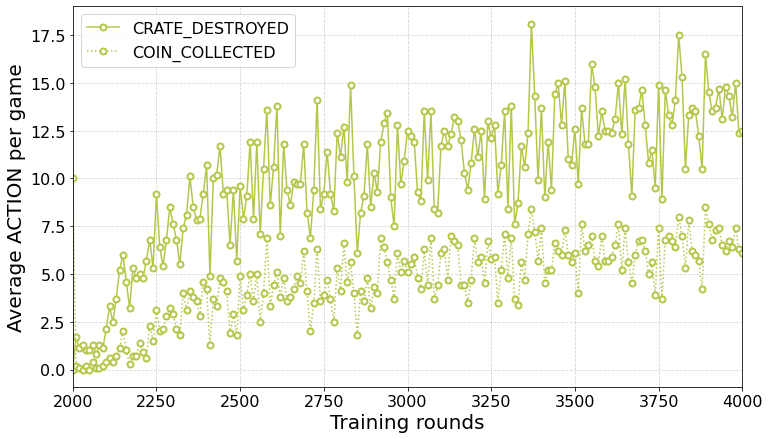

In [302]:
crates_dqn_15, total_rounds_dqn_15 = analyze_stat("ts-almost-empty-enhanced.csv", "CRATE_DESTROYED")
coins_dqn_15, total_rounds_dqn_15 = analyze_stat("ts-almost-empty-enhanced.csv", "COIN_COLLECTED")
crates_dqn_12, total_rounds_dqn_12 = analyze_stat("ts-almost-empty.csv", "CRATE_DESTROYED")
coins_dqn_12, total_rounds_dqn_12 = analyze_stat("ts-almost-empty.csv", "COIN_COLLECTED")
#survived_nat, total_rounds_nat = analyze_stat("ts-nat-1-1-1.csv", "SURVIVED_ROUND")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn_15, crates_dqn_15, label = "CRATE_DESTROYED",
       color = plot_options.color_palette[2])
ax.plot(total_rounds_dqn_15, coins_dqn_15, label = "COIN_COLLECTED",
       color = plot_options.color_palette[2], ls = ":")
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average ACTION per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(2000, 4000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/place_bombs_dont_die_2.png", dpi = 100)

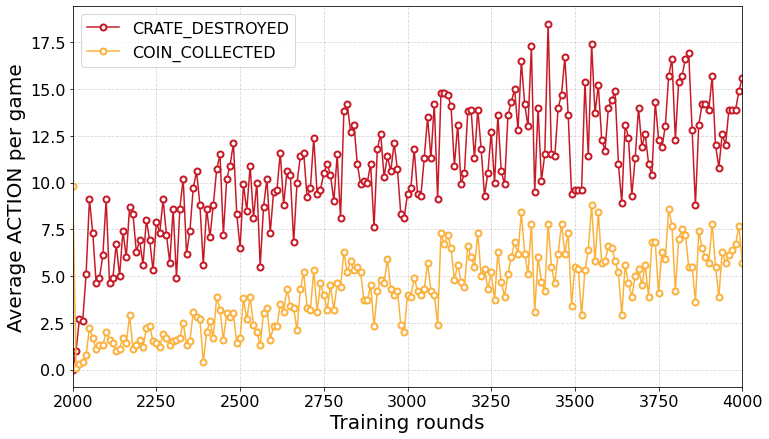

In [303]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn_12, crates_dqn_12, label = "CRATE_DESTROYED")
ax.plot(total_rounds_dqn_12, coins_dqn_12, label = "COIN_COLLECTED")
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average ACTION per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(2000, 4000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/place_bombs_dont_die_3.png", dpi = 100)

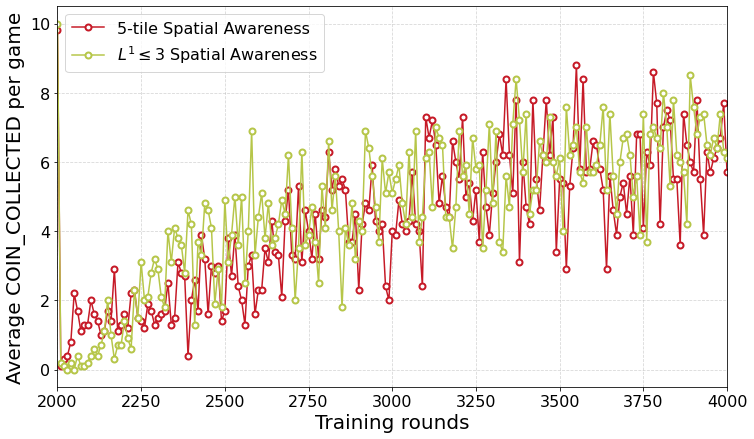

In [304]:
fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_dqn, crates_dqn_15, label = "CRATE_DESTROYED")
ax.plot(total_rounds_dqn, coins_dqn_12, label = "5-tile Spatial Awareness")
ax.plot(total_rounds_dqn, coins_dqn_15, label = "$L^1 \leq 3$ Spatial Awareness",
       color = plot_options.color_palette[2])
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average COIN_COLLECTED per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(2000, 4000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/place_bombs_dont_die_4.png", dpi = 100)

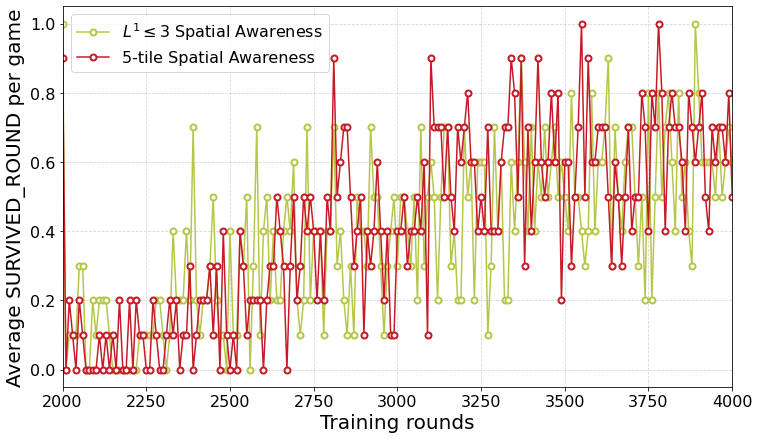

In [305]:
survived_dqn_15, total_rounds_dqn_15 = analyze_stat("ts-almost-empty-enhanced.csv", "SURVIVED_ROUND")
coins_dqn_15, total_rounds_dqn_15 = analyze_stat("ts-almost-empty-enhanced.csv", "COIN_COLLECTED")
survived_dqn_12, total_rounds_dqn_12 = analyze_stat("ts-almost-empty.csv", "SURVIVED_ROUND")
coins_dqn_12, total_rounds_dqn_12 = analyze_stat("ts-almost-empty.csv", "COIN_COLLECTED")

fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_dqn, crates_dqn_15, label = "CRATE_DESTROYED")
ax.plot(total_rounds_dqn, survived_dqn_15, label = "$L^1 \leq 3$ Spatial Awareness",
              color = plot_options.color_palette[2])
ax.plot(total_rounds_dqn, survived_dqn_12, label = "5-tile Spatial Awareness")
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average SURVIVED_ROUND per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(2000, 4000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/place_bombs_dont_die_5.png", dpi = 100)

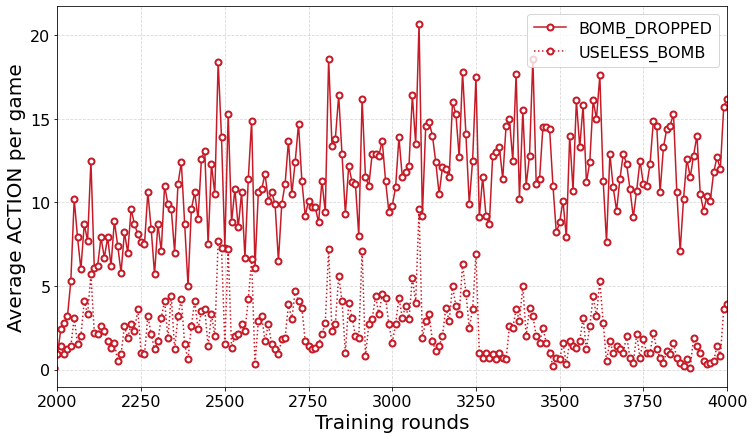

In [306]:


bomb_dqn_12, total_rounds_dqn_12 = analyze_stat("ts-almost-empty.csv", "BOMB_DROPPED")
useless_bomb_dqn_12, total_rounds_dqn_12 = analyze_stat("ts-almost-empty.csv", "USELESS_BOMB")

fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_dqn, crates_dqn_15, label = "CRATE_DESTROYED")
ax.plot(total_rounds_dqn, bomb_dqn_12, label = "BOMB_DROPPED",
              color = plot_options.color_palette[0])
ax.plot(total_rounds_dqn, useless_bomb_dqn_12, label = "USELESS_BOMB",
       color = plot_options.color_palette[0], ls = ':')
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average ACTION per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(2000, 4000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/bomb_useless_bomb.png", dpi = 100)

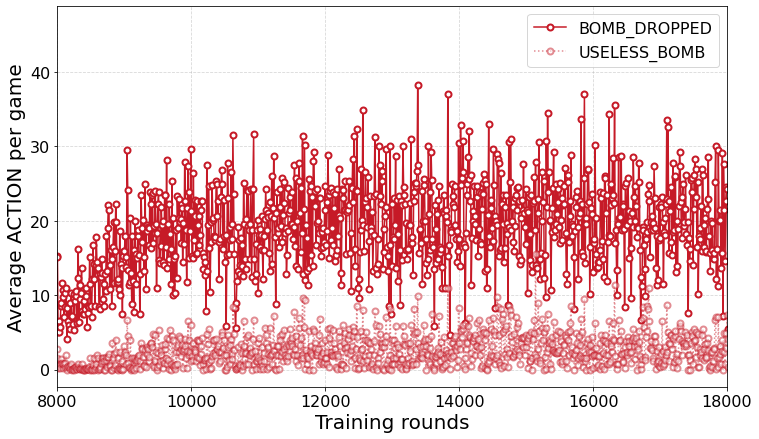

In [307]:
# Load new data
def analyze_stat_ts(ts, stat):
    ts_stat = ts[stat].values
    ts_total_rounds = ts["Rounds Played"].cumsum().values
    ts_rounds_played = ts["Rounds Played"].values
    # Normalize to per game
    log_frequency = 10
    ts_stat = ts_stat / ts_rounds_played
    
    return ts_stat, ts_total_rounds

file_tests_12 = load_data("agent_code/dqn_lapsus_v2_12_tests/training_stats.csv")
file_tests_15 = load_data("agent_code/dqn_lapsus_v2_15_tests/training_stats.csv")

bomb_dqn_12, total_rounds_dqn_12 = analyze_stat_ts(file_tests_12, "BOMB_DROPPED")
useless_bomb_dqn_12, total_rounds_dqn_12 = analyze_stat_ts(file_tests_12, "USELESS_BOMB")
bomb_dqn_15, total_rounds_dqn_15 = analyze_stat_ts(file_tests_15, "BOMB_DROPPED")
useless_bomb_dqn_15, total_rounds_dqn_15 = analyze_stat_ts(file_tests_15, "USELESS_BOMB")


fig, ax = plt.subplots(figsize = (12, 7))
#ax.plot(total_rounds_dqn, crates_dqn_15, label = "CRATE_DESTROYED")
ax.plot(total_rounds_dqn_12, bomb_dqn_12, label = "BOMB_DROPPED",
        color = plot_options.color_palette[0],
        alpha = 1)
ax.plot(total_rounds_dqn_12, useless_bomb_dqn_12, label = "USELESS_BOMB",
        color = plot_options.color_palette[0], ls = ':',
        alpha = 0.5)
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average ACTION per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(8000, 18000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/bomb_useless_bomb_1.png", dpi = 100)

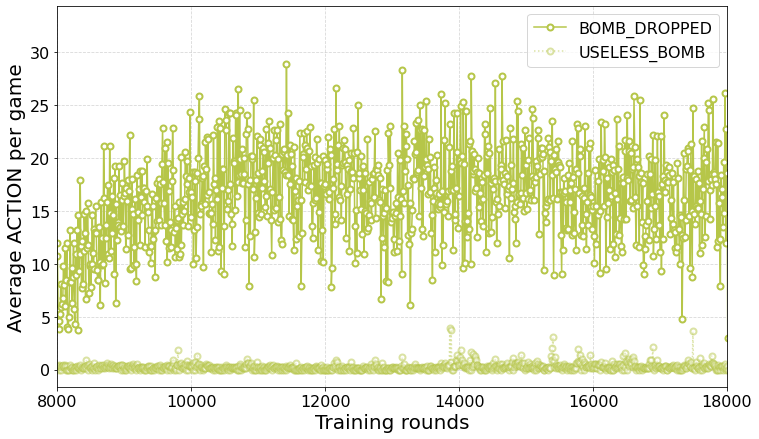

In [308]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_dqn_15, bomb_dqn_15, label = "BOMB_DROPPED",
              color = plot_options.color_palette[2])
ax.plot(total_rounds_dqn_15, useless_bomb_dqn_15, label = "USELESS_BOMB",
       color = plot_options.color_palette[2], ls = ':',
       alpha = 0.5)
#window_size = 20
#moving_avg = np.convolve(bomb_dqn_15, np.ones(window_size) / window_size, mode = "valid")
#ax.plot(total_rounds_dqn_15[10:-9], moving_avg)
#ax.plot(total_rounds_nat, coins_nat / (total_moves_nat / 10), label = "Goal oriented")

ax.set_ylabel("Average ACTION per game")
ax.set_xlabel("Training rounds")
ax.set_xlim(8000, 18000)


ax.legend(loc = 'best')
plt.savefig("data_analysis/diagrams/bomb_useless_bomb_2.png", dpi = 100)

<ipython-input-309-e3d38dddb15b>:5: RuntimeWarning: invalid value encountered in divide
  ax.plot(total_rounds_12, crate_combo_12 / bomb_dqn_12,
<ipython-input-309-e3d38dddb15b>:7: RuntimeWarning: invalid value encountered in divide
  ax.plot(total_rounds_15, crate_combo_15 / bomb_dqn_15,


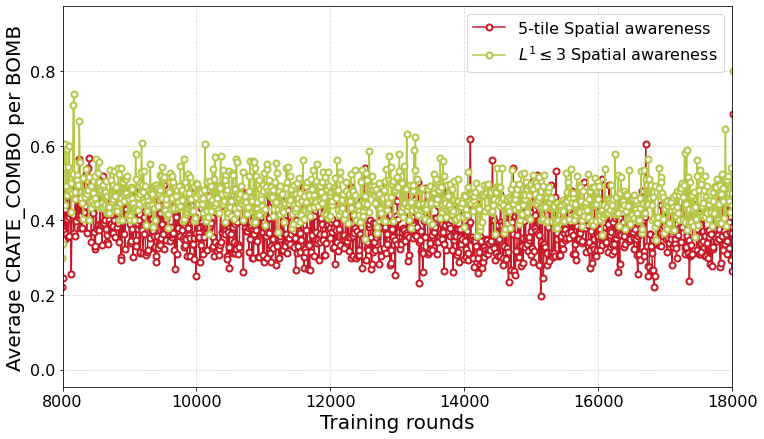

In [309]:
crate_combo_12, total_rounds_12 = analyze_stat_ts(file_tests_12, "CRATE_COMBO")
crate_combo_15, total_rounds_15 = analyze_stat_ts(file_tests_15, "CRATE_COMBO")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, crate_combo_12 / bomb_dqn_12,
       color = plot_options.color_palette[0], label = "5-tile Spatial awareness")
ax.plot(total_rounds_15, crate_combo_15 / bomb_dqn_15,
       color = plot_options.color_palette[2], label = "$L^1 \leq 3$ Spatial awareness" )
ax.set_ylabel("Average CRATE_COMBO per BOMB")
ax.set_xlabel("Training rounds")
ax.set_xlim(8000, 18000)
ax.legend()

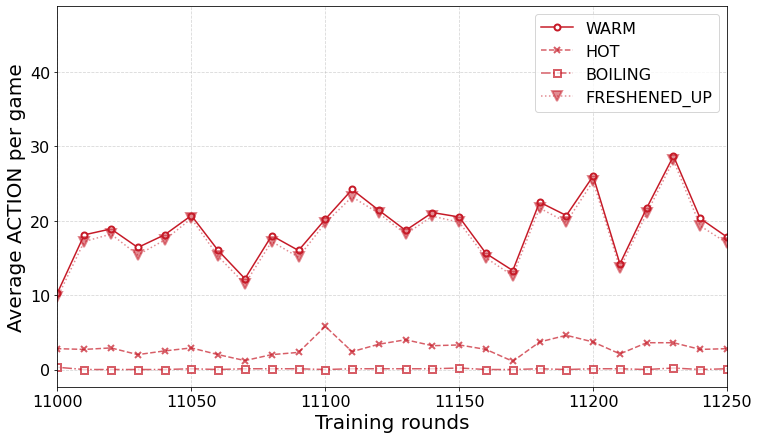

In [310]:
warm_12, total_rounds_12 = analyze_stat_ts(file_tests_12, "WARM")
warm_15, total_rounds_15 = analyze_stat_ts(file_tests_15, "WARM")
hot_12, total_rounds_12 = analyze_stat_ts(file_tests_12, "HOT")
hot_15, total_rounds_15 = analyze_stat_ts(file_tests_15, "HOT")
boiling_12, total_rounds_12 = analyze_stat_ts(file_tests_12, "BOILING")
boiling_15, total_rounds_15 = analyze_stat_ts(file_tests_15, "BOILING")
freshened_up_12, _ = analyze_stat_ts(file_tests_12, "FRESHENED_UP")
freshened_up_15, _ = analyze_stat_ts(file_tests_15, "FRESHENED_UP")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, warm_12, label = "WARM",
       color = plot_options.color_palette[0])
ax.plot(total_rounds_12, hot_12, color = plot_options.color_palette[0],
       ls = '--', label = "HOT", alpha = 0.7, marker = 'x')
ax.plot(total_rounds_12, boiling_12, color = plot_options.color_palette[0],
       ls = '-.', label = "BOILING", alpha = 0.7, marker = 's', markersize = 7)
ax.plot(total_rounds_12, freshened_up_12, color = plot_options.color_palette[0],
       ls = ':', alpha = 0.5, label = "FRESHENED_UP", marker = 'v', markersize = 10,
        mfc = plot_options.color_palette[0]
       )
ax.set_xlabel("Training rounds")
ax.set_ylabel("Average ACTION per game")

ax.set_xlim(11000, 11250)
ax.legend()
plt.savefig("data_analysis/diagrams/WARM-FRESHENED_UP.png", dpi = 100)

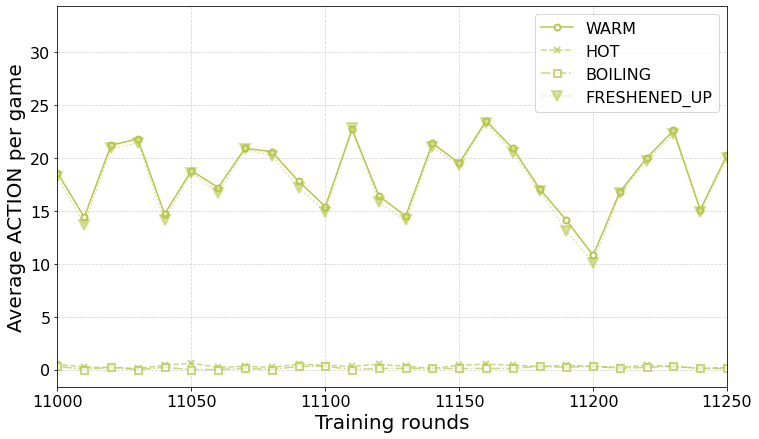

In [311]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_15, warm_15, label = "WARM",
       color = plot_options.color_palette[2])
ax.plot(total_rounds_15, hot_15, color = plot_options.color_palette[2],
       ls = '--', label = "HOT", alpha = 0.7, marker = 'x')
ax.plot(total_rounds_15, boiling_15, color = plot_options.color_palette[2],
       ls = '-.', label = "BOILING", alpha = 0.7, marker = 's', markersize = 7)
ax.plot(total_rounds_15, freshened_up_15, color = plot_options.color_palette[2],
       ls = ':', alpha = 0.5, label = "FRESHENED_UP", marker = 'v', markersize = 10,
        mfc = plot_options.color_palette[2]
       )
ax.set_xlabel("Training rounds")
ax.set_ylabel("Average ACTION per game")

ax.set_xlim(11000, 11250)
ax.legend()
plt.savefig("data_analysis/diagrams/WARM-FRESHENED_UP_2.png", dpi = 100)

## Learning how to kill

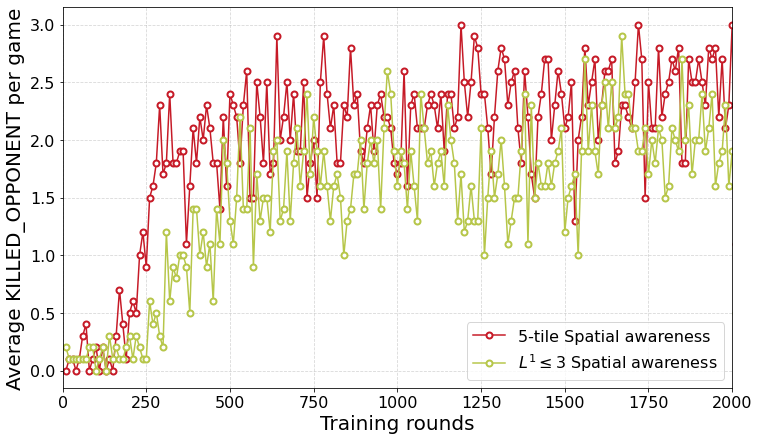

In [312]:
file_12 = load_data("agent_code/dqn_lapsus_v2_12/training_stats.csv")
file_15 = load_data("agent_code/dqn_lapsus_v2_15/training_stats.csv")

killed_12, total_rounds_12 = analyze_stat_ts(file_12, "KILLED_OPPONENT")
killed_15, total_rounds_15 = analyze_stat_ts(file_15, "KILLED_OPPONENT")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, killed_12, color = plot_options.color_palette[0],
       label = "5-tile Spatial awareness")
ax.plot(total_rounds_15, killed_15, color = plot_options.color_palette[2],
       label = "$L^1 \leq 3$ Spatial awareness")
ax.set_xlabel("Training rounds")
ax.set_ylabel("Average KILLED_OPPONENT per game")


ax.set_xlim(0, 2000)
ax.legend()
plt.savefig("data_analysis/diagrams/killed_opponent_0_2000.png", dpi = 100)

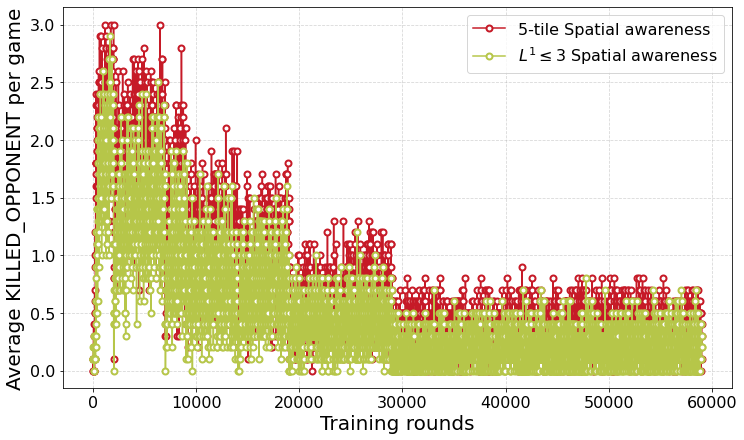

In [313]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, killed_12, color = plot_options.color_palette[0],
       label = "5-tile Spatial awareness")
ax.plot(total_rounds_15, killed_15, color = plot_options.color_palette[2],
       label = "$L^1 \leq 3$ Spatial awareness")
ax.set_xlabel("Training rounds")
ax.set_ylabel("Average KILLED_OPPONENT per game")


#ax.set_xlim(2000, 4000)
ax.legend()
plt.savefig("data_analysis/diagrams/killed_opponent.png", dpi = 100)

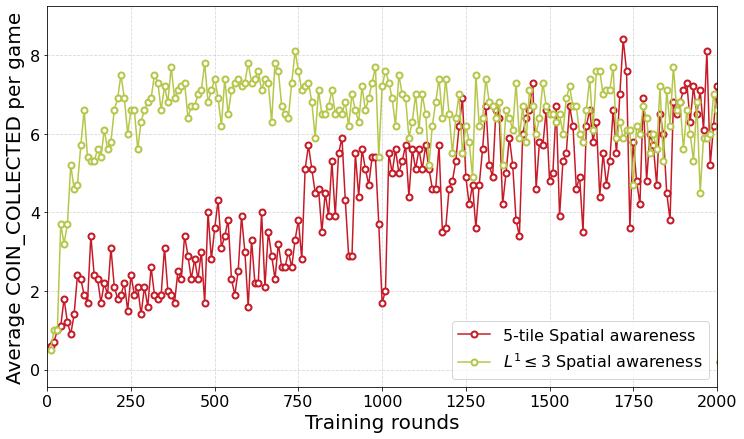

In [314]:
file_12 = load_data("agent_code/dqn_lapsus_v2_12/training_stats.csv")
file_13 = load_data("agent_code/dqn_lapsus_v2_13/training_stats.csv")
file_14 = load_data("agent_code/dqn_lapsus_v2_14/training_stats.csv")
file_15 = load_data("agent_code/dqn_lapsus_v2_15/training_stats.csv")

coins_12, total_rounds_12 = analyze_stat_ts(file_12, "COIN_COLLECTED")
coins_15, total_rounds_15 = analyze_stat_ts(file_15, "COIN_COLLECTED")

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, coins_12, color = plot_options.color_palette[0],
       label = "5-tile Spatial awareness")
ax.plot(total_rounds_15, coins_15, color = plot_options.color_palette[2],
       label = "$L^1 \leq 3$ Spatial awareness")
ax.set_xlabel("Training rounds")
ax.set_ylabel("Average COIN_COLLECTED per game")


ax.set_xlim(0, 2000)
ax.legend()
plt.savefig("data_analysis/diagrams/coin_collected_0_2000.png", dpi = 100)

In [340]:
file_12 = load_data("agent_code/dqn_lapsus_v2_12/training_stats.csv")
file_13 = load_data("agent_code/dqn_lapsus_v2_13/training_stats.csv")
file_14 = load_data("agent_code/dqn_lapsus_v2_14/training_stats.csv")
file_15 = load_data("agent_code/dqn_lapsus_v2_15/training_stats.csv")

time_12, total_rounds_12 = analyze_stat_ts(file_12, "Elapsed Time (s)")
time_13, total_rounds_13 = analyze_stat_ts(file_13, "Elapsed Time (s)")
time_14, total_rounds_14 = analyze_stat_ts(file_14, "Elapsed Time (s)")
time_15, total_rounds_15 = analyze_stat_ts(file_15, "Elapsed Time (s)")

killed_12, _ = analyze_stat_ts(file_12, "KILLED_OPPONENT")
killed_13, _ = analyze_stat_ts(file_13, "KILLED_OPPONENT")
killed_14, _ = analyze_stat_ts(file_14, "KILLED_OPPONENT")
killed_15, _ = analyze_stat_ts(file_15, "KILLED_OPPONENT")

coins_12, _ = analyze_stat_ts(file_12, "COIN_COLLECTED")
coins_13, _ = analyze_stat_ts(file_13, "COIN_COLLECTED")
coins_14, _ = analyze_stat_ts(file_14, "COIN_COLLECTED")
coins_15, _ = analyze_stat_ts(file_15, "COIN_COLLECTED")

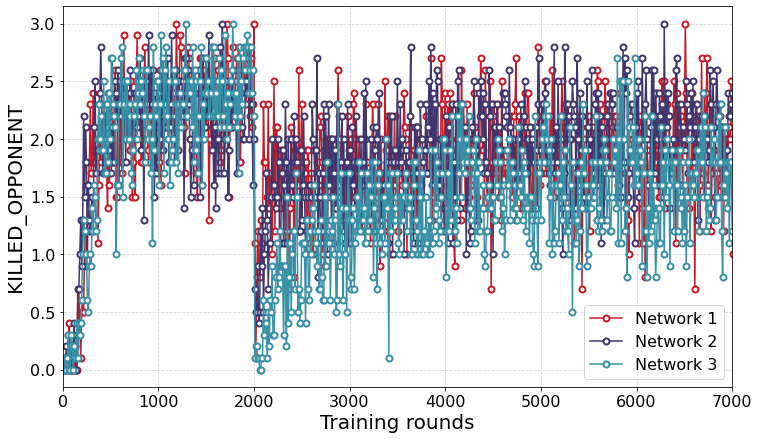

In [316]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, killed_12,
        color = plot_options.color_palette[0],
        alpha = 1, label = "Network 1")
ax.plot(total_rounds_13, killed_13,
        color = plot_options.color_palette[4],
        alpha = 1, label = "Network 2")
ax.plot(total_rounds_14, killed_14,
        color = plot_options.color_palette[3],
        alpha = 1, label = "Network 3")

#ax.plot(total_rounds_15, killed_15)
ax.set_xlabel("Training rounds")
ax.set_ylabel("KILLED_OPPONENT")
ax.set_xlim(0, 7000)
ax.legend()
plt.savefig("data_analysis/diagrams/network_comparison_opponents.png")

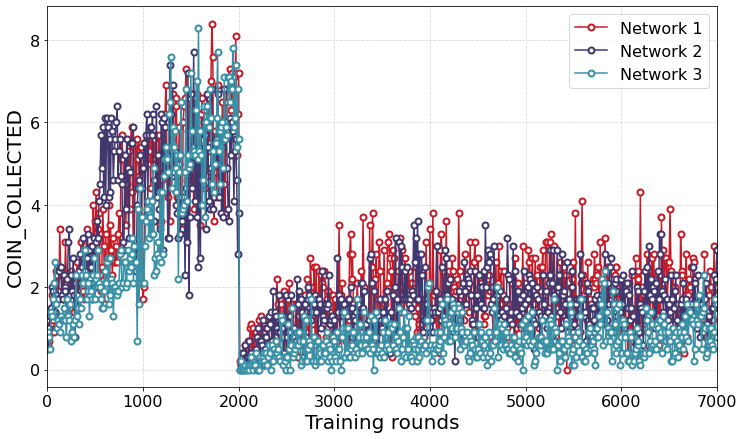

In [317]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, coins_12,
        color = plot_options.color_palette[0],
        alpha = 1, label = "Network 1")
ax.plot(total_rounds_13, coins_13,
        color = plot_options.color_palette[4],
        alpha = 1, label = "Network 2")
ax.plot(total_rounds_14, coins_14,
        color = plot_options.color_palette[3],
        alpha = 1, label = "Network 3")
#ax.plot(total_rounds_15, killed_15)
ax.set_xlabel("Training rounds")
ax.set_ylabel("COIN_COLLECTED")
ax.set_xlim(0, 7000)
ax.legend()
plt.savefig("data_analysis/diagrams/network_comparison_coins.png")

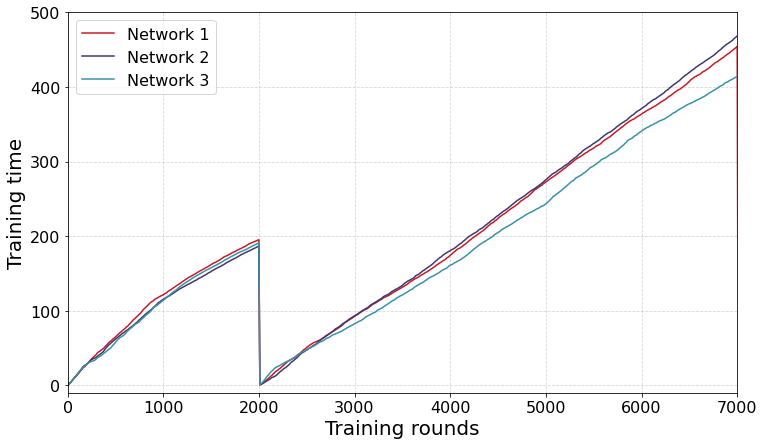

In [318]:
fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(total_rounds_12, time_12,
        color = plot_options.color_palette[0],
        alpha = 1, label = "Network 1",
        marker = 'None')
ax.plot(total_rounds_13, time_13,
        color = plot_options.color_palette[4],
        alpha = 1, label = "Network 2", 
        marker = 'None')
ax.plot(total_rounds_14, time_14,
        color = plot_options.color_palette[3],
        alpha = 1, label = "Network 3",
        marker = 'None')
#ax.plot(total_rounds_15, killed_15)
ax.set_xlabel("Training rounds")
ax.set_ylabel("Training time")
ax.set_xlim(0, 7000)
ax.set_ylim(-10, 500)
ax.legend()
plt.savefig("data_analysis/diagrams/network_comparison_time.png")

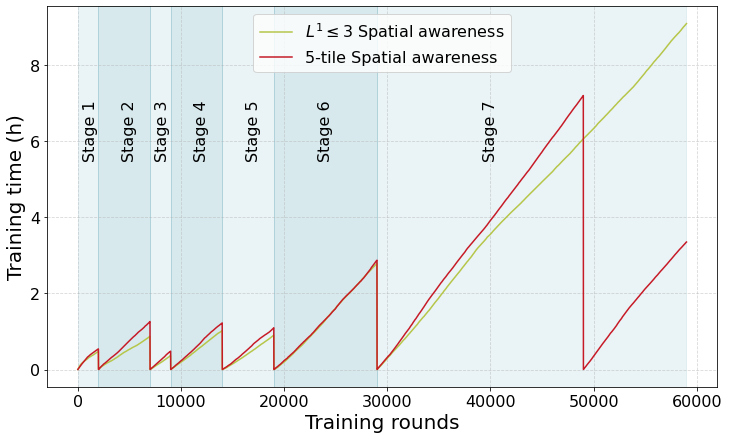

In [404]:
fig, ax = plt.subplots(figsize = (12, 7))
label_rounds_15 = [1250, 5000, 8250, 12000, 17000, 24000, 40000] 
label_time_15 = np.array([2000, 2000, 2000, 2000, 2000, 2000, 2000]) * 10 * 0.000277778
stages = ['Stage 1', 'Stage 2', 'Stage 3', 'Stage 4', 'Stage 5', 'Stage 6', 'Stage 7'] 

ax.plot(total_rounds_15, time_15 * 10 * 0.000277778,
        color = plot_options.color_palette[2],
        alpha = 1, label = "$L^1 \leq 3$ Spatial awareness",
        marker = 'None')
ax.plot(total_rounds_12, time_12 * 10 * 0.000277778,
        color = plot_options.color_palette[0],
        alpha = 1, label = "5-tile Spatial awareness",
        marker = 'None')
#ax.plot(total_rounds_15, killed_15)
ax.set_xlabel("Training rounds")
ax.set_ylabel("Training time (h)")
# 
ax.axvspan(0, 2000, alpha = 0.1, color = plot_options.color_palette[3])
ax.axvspan(2000, 7000, alpha = 0.2, color = plot_options.color_palette[3])
ax.axvspan(7000, 9000, alpha = 0.1, color = plot_options.color_palette[3])
ax.axvspan(9000, 14000, alpha = 0.2, color = plot_options.color_palette[3])
ax.axvspan(14000, 19000, alpha = 0.1, color = plot_options.color_palette[3])
ax.axvspan(19000, 29000, alpha = 0.2, color = plot_options.color_palette[3])
ax.axvspan(29000, 59000, alpha = 0.1, color = plot_options.color_palette[3])

for i, stage in enumerate(stages):
    ax.text(label_rounds_15[i], label_time_15[i] , stage, 
            ha='center', rotation = 90)

#ax.set_ylim(0, 1.25)
ax.legend()
plt.savefig("data_analysis/diagrams/training_time.png")

In [381]:
final_time = np.array([1721, 3149, 1334, 3682, 3246, 10037, 32757]).cumsum()
final_time * 0.000277778

array([ 0.47805594,  1.35277886,  1.72333471,  2.74611331,  3.6477807 ,
        6.43583848, 15.53501243])